# Data story

## List of questions:
1. verify data consistency by examining data collected at various locations for each city; Are they consistent and why? 
2. How does the air quality (PM2.5) vary with hour of the day, day of the week, season of the year, and from year to year? use statistical EDA and graphical EDA to identify daily, weekly, seasonal, and yearly trends of PM2.5;
3. How does the air quality (PM2.5) correlate to the meteorological data (temperature, humidity, pressure, wind direction, wind speed, rain, snow, etc.)? use graphical EDA and inferential statistics to identify the correlation between PM2.5 and weather conditions, rank the weather parameters accordingly;
4. use statistical EDA and visual EDA to run cross-city comparisons on PM2.5: Are there significant difference among five cities? Are there any other factors not included in this dataset, but might cause a significant variation among cities? (population density, energy consumption, winter heat source, numbers of cars, numbers of manufacturing factories, location of the city, air quality control policy, etc.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import pm_clean from 'pm_clean.csv' file
pm_clean=pd.read_csv('pm_clean.csv')
print(pm_clean.head(3))

#convert 'date_time' column to DateTime format
pm_clean['date_time'] = pd.to_datetime(pm_clean['date_time'], format='%Y-%m-%d %H')
print(pm_clean.info())

   Unnamed: 0  year  month  day  hour  season  dewp  humi    pres  temp cbwd  \
0           0  2010      1    1    22       4 -17.0  38.0  1018.0  -5.0   NW   
1           1  2010      1    1    23       4 -17.0  41.0  1020.0  -5.0   CV   
2           2  2010      1    2     0       4 -16.0  38.0  1020.0  -4.0   SE   

    iws  precipitation  iprec     city  pm_average            date_time  
0  2.68            0.0    0.0  beijing       129.0  2010-01-01 22:00:00  
1  0.89            0.0    0.0  beijing       129.0  2010-01-01 23:00:00  
2  1.79            0.0    0.0  beijing       148.0  2010-01-02 00:00:00  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176267 entries, 0 to 176266
Data columns (total 17 columns):
Unnamed: 0       176267 non-null int64
year             176267 non-null int64
month            176267 non-null int64
day              176267 non-null int64
hour             176267 non-null int64
season           176267 non-null int64
dewp             175801 non-null float

In [3]:
#extract the data for each city and store in corresponding dataframes
#city 'beijing'
bj = pm_clean[pm_clean['city']=='beijing']
#city 'shanghai'
sh = pm_clean[pm_clean['city']=='shanghai']
#city 'guangzhou'
gz = pm_clean[pm_clean['city']=='guangzhou']
#city 'chengdu'
cd = pm_clean[pm_clean['city']=='chengdu']
#city 'shenyang'
sy = pm_clean[pm_clean['city']=='shenyang']

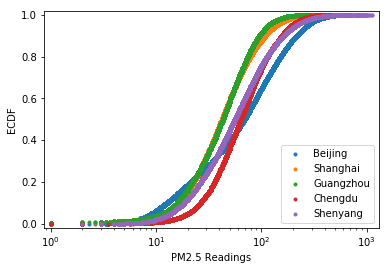

In [4]:
#plot 'pm_average' ECDF for all five cities

#user-defined funciton for computing ECDF of a given array
def ecdf(array):
    """Compute ECDF for a one-dimentional array of measurement data."""
    #sort array to use as the x axis
    x = np.sort(array)
    #use np.arange to create the y axis for cdf from 1/len to 1
    y = np.arange(1, len(array)+1)/len(array)
    #return x and y as the data for x axis and y axis, repectively
    return x,y

# Compute ECDFs for five cities, and plot all ECDFs on the same plot
for df_city in (bj,sh,gz,cd,sy):
    x, y = ecdf(df_city['pm_average'])
    plt.plot(x, y, marker = '.', linestyle='none');

# plot formatting
plt.xscale('log');
plt.margins(0.02);

# Annotate the plot
plt.legend(('Beijing', 'Shanghai', 'Guangzhou','Chengdu','Shenyang'), loc='lower right');
plt.xlabel('PM2.5 Readings');
plt.ylabel('ECDF');

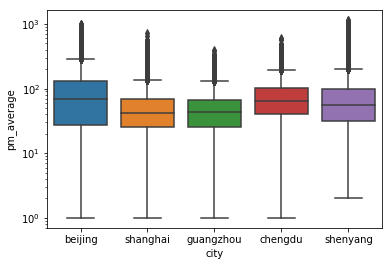

In [5]:
#plot 'pm_average' boxplot for all five cities
sns.boxplot(x='city',y='pm_average',data=pm_clean);
plt.yscale('log');

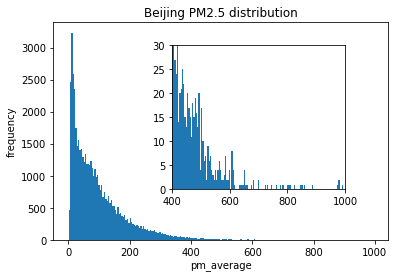

In [6]:
#plot 'pm_average' distribution for bj
n_bins=int(np.sqrt(len(bj)))
plt.hist(bj['pm_average'], bins=n_bins);
plt.xlabel('pm_average');
plt.ylabel('frequency');
plt.title('Beijing PM2.5 distribution');
plt.axes([0.4,0.3,0.4,0.5]);
plt.hist(bj['pm_average'], bins=n_bins);
plt.xlim([400,1000]);
plt.ylim([0,30]);

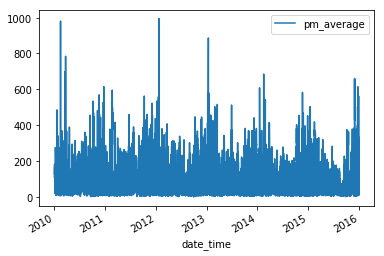

In [7]:
#plot time series 'pm_average' data for bj
bj.reset_index(drop=True).set_index('date_time').plot(y='pm_average');

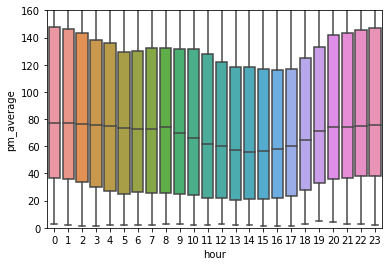

In [8]:
#plot 'pm_average' by hour
sns.boxplot(x='hour',y='pm_average',data=bj);
plt.ylim([0,160]);

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


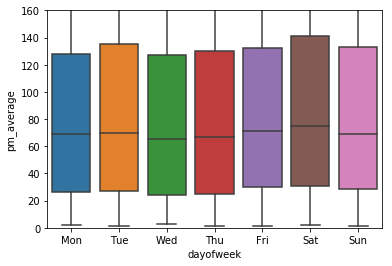

In [9]:
#plot 'pm_average' by day of the week
bj['dayofweek'] = bj['date_time'].dt.dayofweek
sns.boxplot(x='dayofweek',y='pm_average',data=bj);
plt.ylim([0,160]);
plt.xticks(range(7),['Mon','Tue','Wed','Thu','Fri','Sat','Sun']);

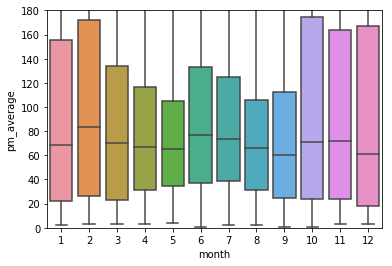

In [10]:
#plot 'pm_average' by month
sns.boxplot(x='month', y='pm_average',data=bj);
plt.ylim([0,180]);

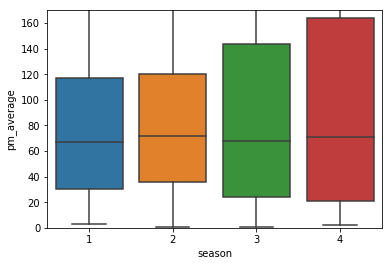

In [11]:
#plot 'pm_average' by season
sns.boxplot(x='season',y='pm_average',data=bj);
plt.ylim([0,170]);

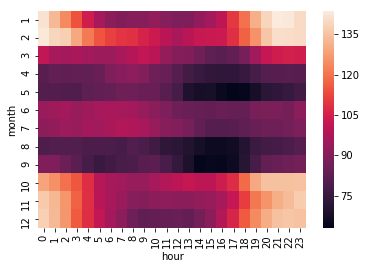

In [12]:
#plot 'pm_average' 2D distribution by month and by hour of the day
bj_monhr=bj.pivot_table(index='month',columns='hour',values='pm_average',aggfunc='mean')
sns.heatmap(bj_monhr);

pres   991.0   992.0   993.0   994.0   995.0   996.0   997.0   998.0   999.0   \
temp                                                                            
-19.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-18.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-17.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-16.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-15.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

pres   1000.0   ...       1037.0  1038.0  1039.0  1040.0  1041.0  1042.0  \
temp            ...                                                        
-19.0     NaN   ...          NaN     NaN     NaN     NaN     NaN     NaN   
-18.0     NaN   ...          NaN     NaN     NaN     NaN     NaN     NaN   
-17.0     NaN   ...          NaN    56.0     NaN     NaN     NaN     NaN   
-16.0     NaN   ...          NaN    58.0     NaN    

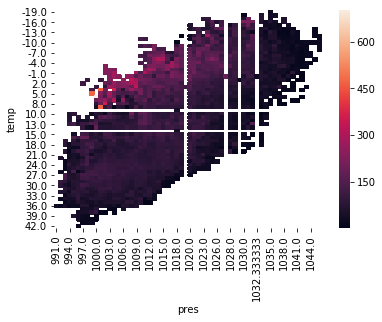

In [13]:
#plot 'pm_average' distribution by temperature and by pressure
bj_temppres=bj.pivot_table(index='temp',columns='pres',values='pm_average',aggfunc='mean')
print(bj_temppres.head())
sns.heatmap(bj_temppres);

The Pearson's correlation coefficient for temperature and pressure:  -0.7983641372346818


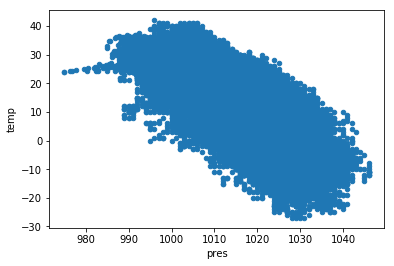

In [14]:
#correlation between temperature and pressure
#extract 'temp' and 'pres' columns from pm_clean and drop rows with any missing temperature or pressure data
temppres=pm_clean[['temp','pres']].dropna(axis=0,how='any')

temppres.plot(x='pres',y='temp',kind='scatter');
r_temppres=np.corrcoef(temppres['pres'],temppres['temp'])[0,1]
print("The Pearson's correlation coefficient for temperature and pressure: ", r_temppres)
#there is a strong negative correlation between temperature and pressure

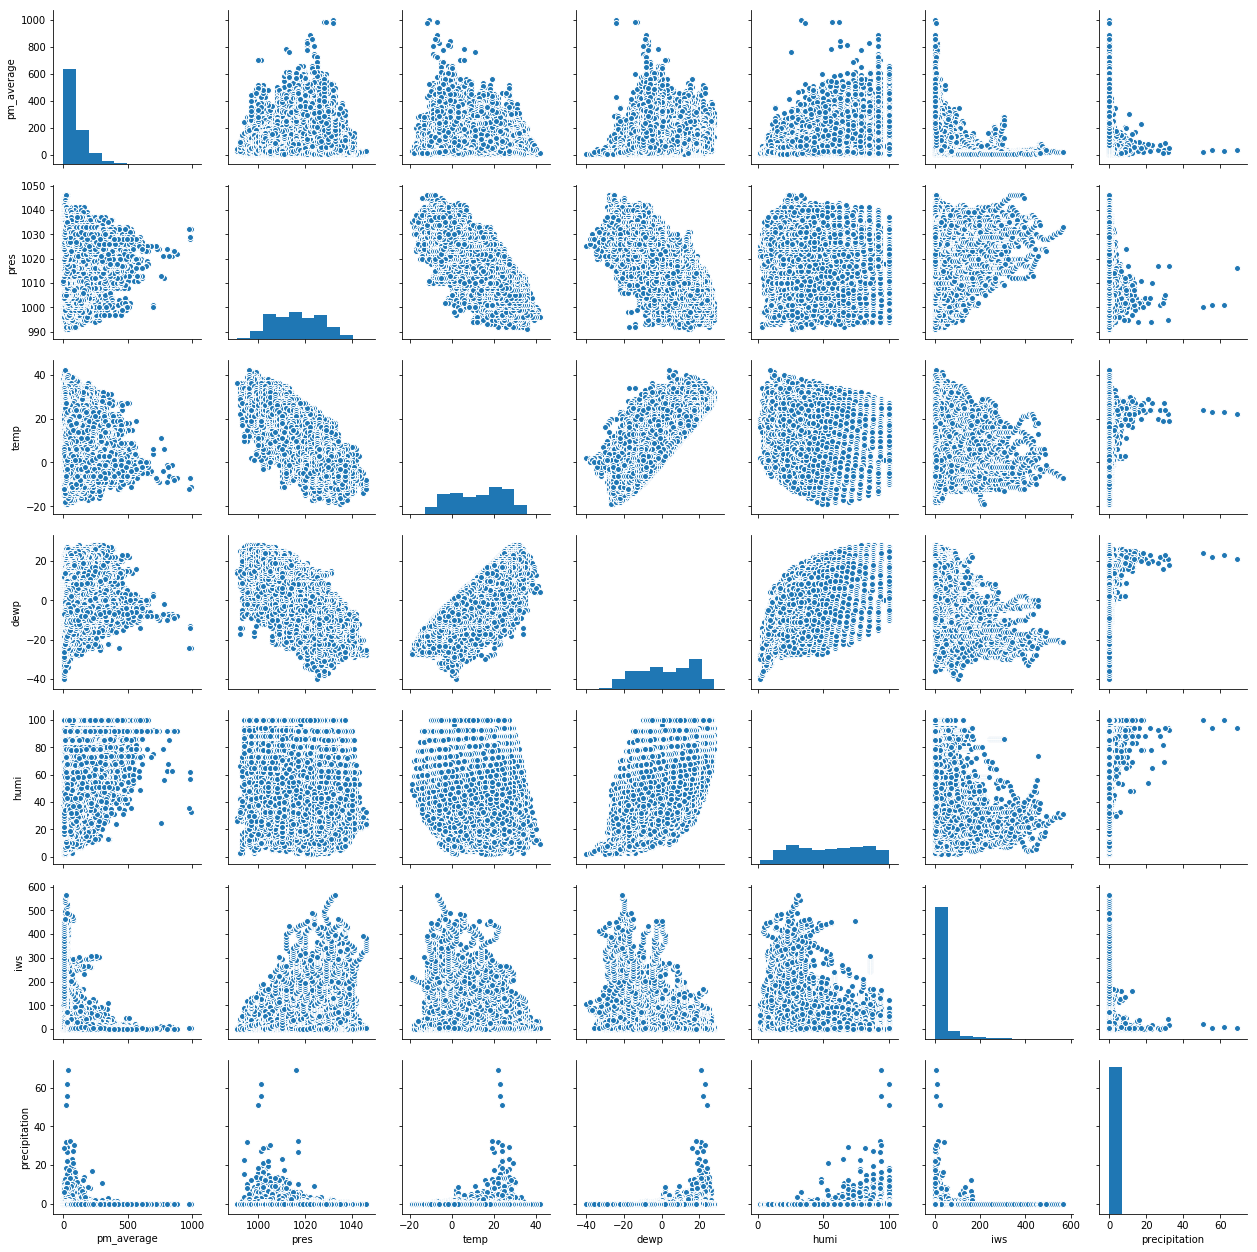

In [15]:
#plot correlation between 'pm_average' and the numerical columns that might have an impact on pm2.5
bj_corr=bj[['date_time','pm_average','pres','temp','dewp','humi','iws','precipitation']].reset_index(drop=True).set_index('date_time')
bj_corr=bj_corr.dropna()
sns.pairplot(bj_corr);

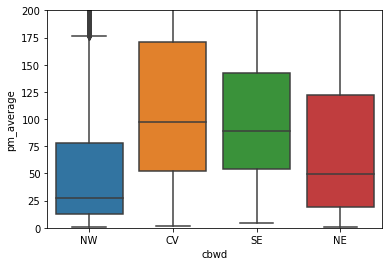

In [16]:
#plot 'pm_average' distribution by 'cbwd'
sns.boxplot(x='cbwd',y='pm_average',data=bj);
plt.ylim([0,200]);

## pm_stations

In [17]:
#import pm_stations from 'pm_stations.csv' file
pm_stations = pd.read_csv('pm_stations.csv')

#convert 'date_time' column to DateTime format
pm_stations['date_time']=pd.to_datetime(pm_stations['date_time'],format='%Y-%m-%d %H')
print(pm_stations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175245 entries, 0 to 175244
Data columns (total 19 columns):
date_time               175245 non-null datetime64[ns]
year                    175245 non-null int64
month                   175245 non-null int64
day                     175245 non-null int64
hour                    175245 non-null int64
season                  175245 non-null int64
city                    175245 non-null object
pm_us post              167358 non-null float64
pm_dongsi               25052 non-null float64
pm_dongsihuan           20508 non-null float64
pm_nongzhanguan         24931 non-null float64
pm_jingan               24700 non-null float64
pm_xuhui                25189 non-null float64
pm_city station         32352 non-null float64
pm_5th middle school    21095 non-null float64
pm_caotangsi            24420 non-null float64
pm_shahepu              24594 non-null float64
pm_taiyuanjie           24388 non-null float64
pm_xiaoheyan            24627 non-null 

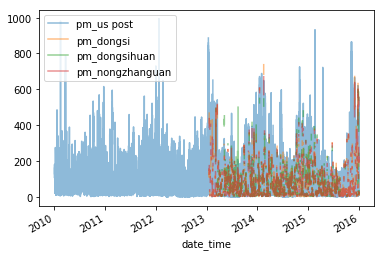

In [18]:
#extract the pm2.5 data from four stations in city 'beijing' and set 'date_time' column as DateTime Index
stations_bj=pm_stations[['date_time','pm_us post','pm_dongsi','pm_dongsihuan','pm_nongzhanguan']].reset_index(drop=True).set_index('date_time')
#compare the consistency among four PM2.5 measuring locations in Beijing
stations_bj.plot(alpha=0.5);

#note prior to 2013, only 'PM_US Post' has PM2.5 data, whereas 'pm_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan' didn't have data until 2013

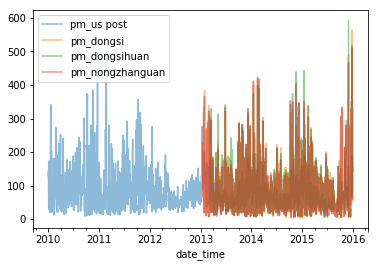

In [19]:
#resample by daily average
stations_bj_daily=stations_bj.resample('D').mean()
stations_bj_daily.plot(alpha=0.5);

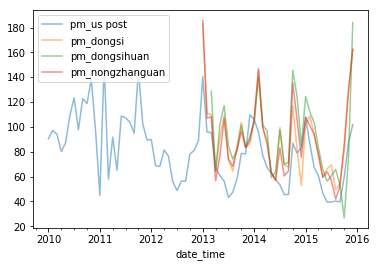

In [20]:
#resample by monthly average
stations_bj_monthly=stations_bj.resample('M').mean()
stations_bj_monthly.plot(alpha=0.5);

### Quick summary
the above plots reveal that the PM2.5 measurements at four different locations in Beijing are reasonably consistent, with minor variations.